# 서울시 자치구 별 CCTV

In [2]:
import pandas as pd
import time 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import numpy as np

### 서울 열린데이터 광장에 있는 CCTV 현황 엑셀 다운받기

In [28]:
driver = webdriver.Chrome('../05.Crawling/chromedriver.exe')
driver.maximize_window()
driver.get('https://data.seoul.go.kr')
time.sleep(1)
driver.find_element_by_css_selector('#searchKeyword').send_keys('CCTV')
time.sleep(2)
driver.find_element_by_xpath('//*[@id="datasetVO"]/div/div[1]/button').click()
time.sleep(1)
driver.find_element_by_xpath('//*[@id="datasetVO"]/div[2]/div/section/div[2]/dl[1]/dt/a').click()
time.sleep(1)
driver.find_element_by_xpath('//*[@id="fileTr_1"]/td[6]/a').click()
time.sleep(2)

### 서울시 서울통계 사이트를 통해 서울인구 알아보기

In [29]:
driver = webdriver.Chrome('../05.Crawling/chromedriver.exe')
driver.maximize_window()
driver.get('https://data.seoul.go.kr')
time.sleep(1)
driver.find_element_by_xpath('//*[@id="baseBody"]/div[1]/div/div[2]/div[1]/a[11]').click()
time.sleep(1)
driver.find_element_by_xpath('//*[@id="datasetVO"]/div[2]/div/section/div[2]/dl[1]/dt/a').click()
time.sleep(1)
driver.find_element_by_css_selector('#btnCsv').click()

In [30]:
driver.quit()

### 가져온 데이터 읽기

In [11]:
cctv_Seoul = pd.read_excel('./data/서울시 자치구 년도별 CCTV 설치 현황(2011년 이전_2018년).xlsx')
cctv_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [12]:
cctv_Seoul.rename(columns={cctv_Seoul.columns[0] : '구별'}, inplace=True)
cctv_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [13]:
pop_Seoul = pd.read_csv('./data/pop_report.txt', delimiter = '\t',header=2)[['자치구','계','계.1','계.2','65세이상고령자']]
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [14]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] :'구별',
                        pop_Seoul.columns[1] : '인구수',
                        pop_Seoul.columns[2] : '한국인',
                        pop_Seoul.columns[3] : '외국인',
                        pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


### CCTV 와 인구 현황 데이터 파악하기

In [15]:
cctv_Seoul.sort_values(by= '소계', ascending=True).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328


In [16]:
cctv_Seoul.sort_values(by= '소계', ascending=False).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성 북 구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은 평 구,2962,1365.0,83.0,99.0,343,180,296,229,367


In [17]:
# 책이랑 맞추기 위해서 최근 3년과 그 이전으로 나눔
cctv_Seoul['2015년 이전'] = cctv_Seoul['2015년']+cctv_Seoul['2014년']+cctv_Seoul['2013년']+cctv_Seoul['2012년']+cctv_Seoul['2011년 이전']

In [18]:
cctv_Seoul = cctv_Seoul[['구별','소계','2015년 이전','2016년','2017년','2018년']]

In [19]:
# 최근 증가율
cctv_Seoul['최근증가율'] = (
    cctv_Seoul['2018년']
    +cctv_Seoul['2017년']
    +cctv_Seoul['2016년']
    )/cctv_Seoul['2015년 이전'] * 100
cctv_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2015년 이전,2016년,2017년,2018년,최근증가율
23,중 구,1544,629.0,270,317,328,145.468998
19,영등포구,2495,1042.0,289,371,793,139.443378
15,성 동 구,2679,1251.0,201,933,294,114.148681
7,금 천 구,1634,769.0,136,199,530,112.483745
5,광 진 구,1581,746.0,21,468,346,111.930295


In [20]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"
5,광진구,"361,923","348,064","13,859","50,047"


In [21]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [22]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인']/pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자']/pop_Seoul['인구수'] * 100
pop_Seoul.head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [23]:
# 문자열 정수로 변경하기
pop_Seoul['인구수'] = pop_Seoul['인구수'].str.replace(',', '').astype('int64')
pop_Seoul['한국인'] = pop_Seoul['한국인'].str.replace(',', '').astype('int64')
pop_Seoul['외국인'] = pop_Seoul['외국인'].str.replace(',', '').astype('int64')
pop_Seoul['고령자'] = pop_Seoul['고령자'].str.replace(',', '').astype('int64')

In [24]:
pop_Seoul['외국인비율'] = (pop_Seoul['외국인']/pop_Seoul['인구수']) * 100
pop_Seoul['고령자비율'] = (pop_Seoul['고령자']/pop_Seoul['인구수']) * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


In [25]:
pop_Seoul.sort_values(by='인구수',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,676673,670331,6342,92149,0.937233,13.617951
16,강서구,589536,583544,5992,88052,1.016393,14.935814
23,강남구,544085,539235,4850,73942,0.891405,13.590156
11,노원구,529532,525486,4046,84612,0.764071,15.978638
21,관악구,514555,498574,15981,78206,3.105790,15.198764


In [26]:
pop_Seoul.sort_values(by='외국인',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,405982,375630,30352,60826,7.476194,14.982438
17,구로구,435751,405579,30172,69312,6.924138,15.906332
18,금천구,249641,232157,17484,39361,7.003657,15.767041
21,관악구,514555,498574,15981,78206,3.105790,15.198764
3,용산구,244953,229786,15167,39995,6.191800,16.327622


In [27]:
pop_Seoul.sort_values(by='외국인비율',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,405982,375630,30352,60826,7.476194,14.982438
2,중구,135321,125800,9521,24265,7.035863,17.931437
18,금천구,249641,232157,17484,39361,7.003657,15.767041
17,구로구,435751,405579,30172,69312,6.924138,15.906332
3,용산구,244953,229786,15167,39995,6.191800,16.327622


In [28]:
pop_Seoul.sort_values(by='고령자',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,676673,670331,6342,92149,0.937233,13.617951
16,강서구,589536,583544,5992,88052,1.016393,14.935814
11,노원구,529532,525486,4046,84612,0.764071,15.978638
12,은평구,485842,481546,4296,84353,0.884238,17.362229
21,관악구,514555,498574,15981,78206,3.105790,15.198764


In [29]:
pop_Seoul.sort_values(by='고령자비율',ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,313550,309996,3554,62951,1.133472,20.076862
10,도봉구,329300,327248,2052,61388,0.623140,18.641968
2,중구,135321,125800,9521,24265,7.035863,17.931437
1,종로구,159842,149952,9890,28396,6.187360,17.765043
12,은평구,485842,481546,4296,84353,0.884238,17.362229


### CCTV 데이터와 인구 현황 데이터를 합치고 분석하기

In [30]:
# 구별 데이터에 ' '가 있어서 오류
cctv_Seoul['구별'] = cctv_Seoul['구별'].str.replace(' ', '')

In [31]:
pop_Seoul.sort_values(by='구별',inplace=True)
pop_Seoul.reset_index(drop=True,inplace=True)

In [32]:
data_result = pd.merge(cctv_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2015년 이전,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,3431.0,765,577,448,52.171379,544085,539235,4850,73942,0.891405,13.590156
1,강동구,1879,1027.0,194,273,385,82.960078,462275,458058,4217,68798,0.912228,14.882483
2,강북구,1265,691.0,254,1,319,83.068017,313550,309996,3554,62951,1.133472,20.076862
3,강서구,1617,909.0,190,264,254,77.887789,589536,583544,5992,88052,1.016393,14.935814
4,관악구,3985,2001.0,619,694,671,99.150425,514555,498574,15981,78206,3.105790,15.198764


In [33]:
del data_result['2015년 이전']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
1,강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483
2,강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862
3,강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814
4,관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764


In [34]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483
강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764


In [35]:
data_result.to_csv('./data/CCTV_result.csv',sep=',',encoding='utf8')

In [114]:
# 상관계수
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.45361392],
       [-0.45361392,  1.        ]])

In [115]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.06150919],
       [-0.06150919,  1.        ]])

In [116]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.38021221],
       [0.38021221, 1.        ]])

In [117]:
data_result.sort_values(by='소계', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764
구로구,3227,72.106667,435751,405579,30172,69312,6.924138,15.906332
성북구,3003,78.008299,449871,439719,10152,73370,2.256647,16.309120
은평구,2962,43.091787,485842,481546,4296,84353,0.884238,17.362229


In [118]:
data_result.sort_values(by='인구수', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1586,62.833676,676673,670331,6342,92149,0.937233,13.617951
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
노원구,1906,42.026826,529532,525486,4046,84612,0.764071,15.978638
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764


### CCTV 현황 그래프로 분석하기

In [169]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [170]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

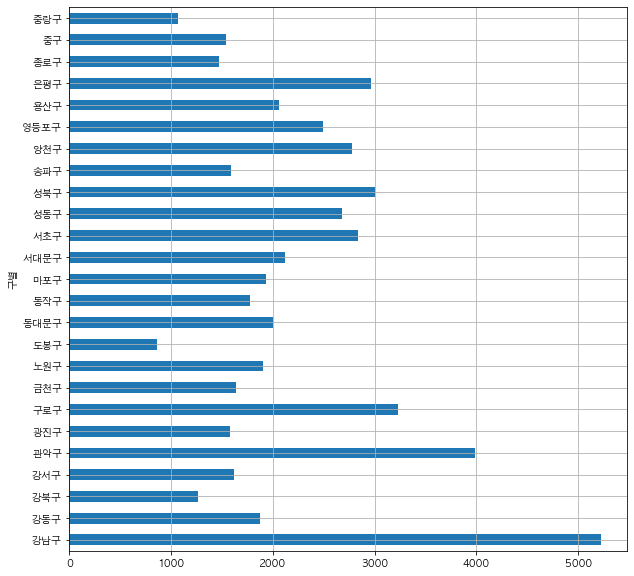

In [171]:
data_result['소계'].plot(kind='barh', grid= True, figsize=(10,10))
plt.show()

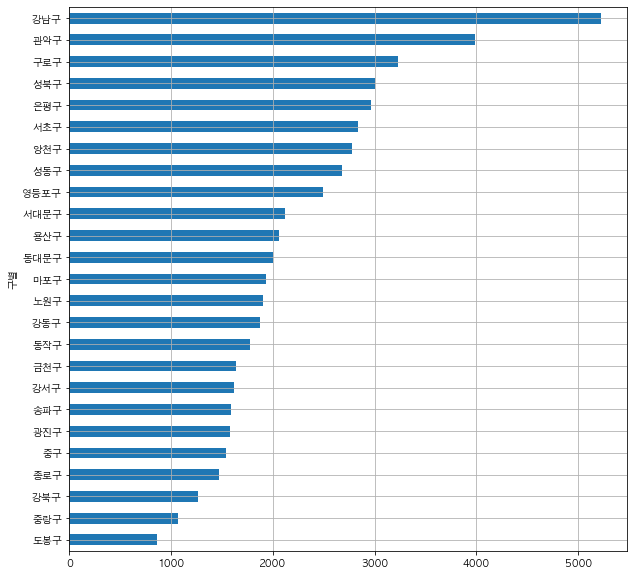

In [172]:
data_result['소계'].sort_values().plot(kind='barh', grid= True, figsize=(10,10))
plt.show()

In [122]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

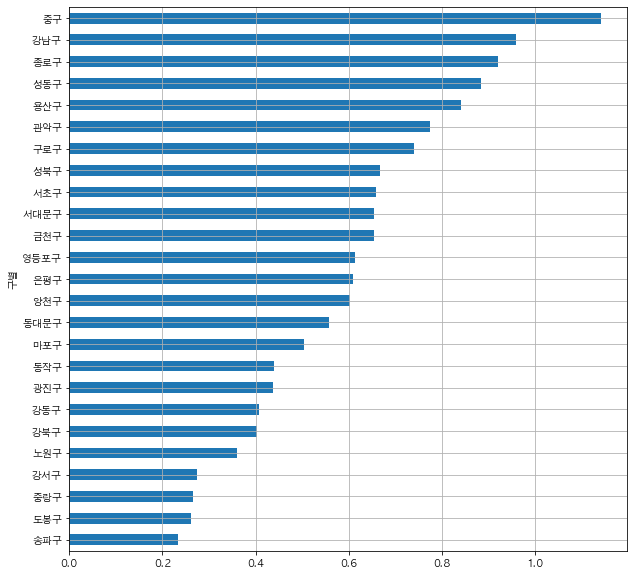

In [173]:
data_result['CCTV비율'].sort_values().plot(kind='barh', grid= True, figsize=(10,10))
plt.show()

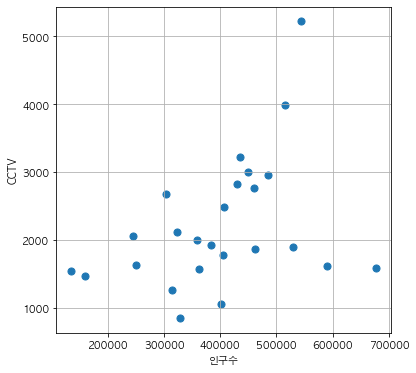

In [174]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [125]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.89293854e-03, 1.06798227e+03])

In [126]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

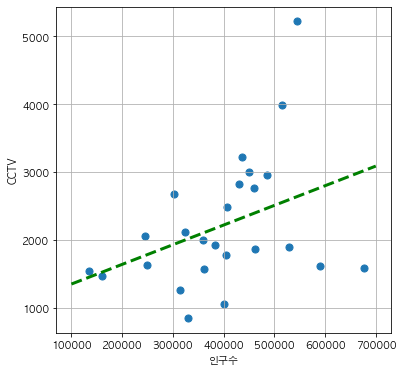

In [175]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [128]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
송파구,1586,62.833676,676673,670331,6342,92149,0.937233,13.617951,0.234382,1439.555667
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743
도봉구,858,66.601942,329300,327248,2052,61388,0.623140,18.641968,0.260553,1162.626928
중랑구,1068,NaN,400989,395997,4992,68658,1.244922,17.122165,0.266341,1160.018799


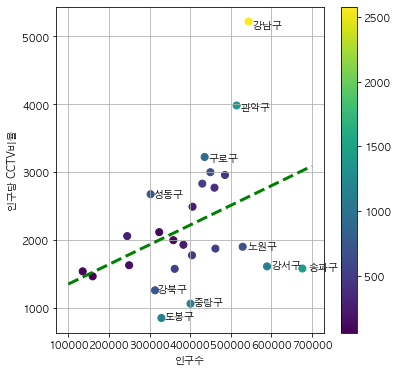

In [177]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'],c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n] , fontsize=10)

plt.xlabel('인구수')
plt.ylabel('인구당 CCTV비율')

plt.colorbar()
plt.grid()
plt.show()

### 가구원수별 가구수(구별) 데이터를 바탕으로 분석하기

In [132]:
driver = webdriver.Chrome('../05.Crawling/chromedriver.exe')
driver.maximize_window()
driver.get('https://data.seoul.go.kr')
time.sleep(1)
driver.find_element_by_css_selector('#searchKeyword').send_keys('가구원수별 가구수')
time.sleep(2)
driver.find_element_by_xpath('//*[@id="datasetVO"]/div/div[1]/button').click()
time.sleep(1)
driver.find_element_by_xpath('//*[@id="datasetVO"]/div[2]/div/section/div[2]/dl[3]/dt/a').click()
time.sleep(1)
driver.find_element_by_css_selector('#btnCsv').click()

In [133]:
driver.quit()

In [134]:
house_Seoul = pd.read_csv('./data/house_report.txt', delimiter = '\t',header= 1)
house_Seoul.head()

,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,2019,합계,"3,896,389","1,299,787","1,005,065","801,819","614,026","138,596","29,336","7,760",2.3
1,2019,종로구,"62,652","24,671","16,208","11,154","7,828","2,143",505,143,2.2
2,2019,중구,"54,496","22,078","14,578","9,540","6,292","1,533",373,102,2.1
3,2019,용산구,"93,177","35,148","25,164","17,439","11,736","2,907",612,171,2.2
4,2019,성동구,"122,770","41,488","32,125","25,634","18,379","4,014",877,253,2.3


In [135]:
# 문자열을 정수로 바꾸기
house_Seoul['일반가구수'] = house_Seoul['일반가구수'].str.replace(',', '').astype('int64')
house_Seoul['1인'] = house_Seoul['1인'].str.replace(',', '').astype('int64')
house_Seoul['2인'] = house_Seoul['2인'].str.replace(',', '').astype('int64')
house_Seoul['3인'] = house_Seoul['3인'].str.replace(',', '').astype('int64')
house_Seoul['4인'] = house_Seoul['4인'].str.replace(',', '').astype('int64')
house_Seoul['5인'] = house_Seoul['5인'].str.replace(',', '').astype('int64')
house_Seoul['6인'] = house_Seoul['6인'].str.replace(',', '').astype('int64')
house_Seoul['7인 이상'] = house_Seoul['7인 이상'].str.replace(',', '').astype('int64')
house_Seoul.head()

,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,2019,합계,3896389,1299787,1005065,801819,614026,138596,29336,7760,2.3
1,2019,종로구,62652,24671,16208,11154,7828,2143,505,143,2.2
2,2019,중구,54496,22078,14578,9540,6292,1533,373,102,2.1
3,2019,용산구,93177,35148,25164,17439,11736,2907,612,171,2.2
4,2019,성동구,122770,41488,32125,25634,18379,4014,877,253,2.3


In [136]:
house_Seoul['4인 이상'] = house_Seoul['4인'] + house_Seoul['5인'] + house_Seoul['6인'] + house_Seoul['7인 이상']
house_Seoul.head() 

,기간,구분,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수,4인 이상
0,2019,합계,3896389,1299787,1005065,801819,614026,138596,29336,7760,2.3,789718
1,2019,종로구,62652,24671,16208,11154,7828,2143,505,143,2.2,10619
2,2019,중구,54496,22078,14578,9540,6292,1533,373,102,2.1,8300
3,2019,용산구,93177,35148,25164,17439,11736,2907,612,171,2.2,15426
4,2019,성동구,122770,41488,32125,25634,18379,4014,877,253,2.3,23523


In [137]:
del house_Seoul['4인']
del house_Seoul['5인']
del house_Seoul['6인']
del house_Seoul['7인 이상']

In [138]:
house_Seoul = house_Seoul[['구분' , '1인', '2인', '3인', '4인 이상', '평균가구원수']]
house_Seoul.head()

,구분,1인,2인,3인,4인 이상,평균가구원수
0,합계,1299787,1005065,801819,789718,2.3
1,종로구,24671,16208,11154,10619,2.2
2,중구,22078,14578,9540,8300,2.1
3,용산구,35148,25164,17439,15426,2.2
4,성동구,41488,32125,25634,23523,2.3


In [139]:
house_Seoul.rename(columns={"구분":"구별"}, inplace=True) 
house_Seoul.drop([0], inplace=True)

In [140]:
house_Seoul

,구별,1인,2인,3인,4인 이상,평균가구원수
1,종로구,24671,16208,11154,10619,2.2
2,중구,22078,14578,9540,8300,2.1
3,용산구,35148,25164,17439,15426,2.2
4,성동구,41488,32125,25634,23523,2.3
5,광진구,58714,35678,28054,27459,2.2
6,동대문구,58152,36060,27436,26701,2.2
7,중랑구,52196,44057,33160,31363,2.3
8,성북구,57832,44443,37033,37421,2.4
9,강북구,42791,35439,25967,23815,2.3
10,도봉구,32653,36329,29580,28269,2.5


In [141]:
data_result2 = pd.merge(pop_Seoul, house_Seoul, on='구별')
data_result2.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,1인,2인,3인,4인 이상,평균가구원수
0,강남구,544085,539235,4850,73942,0.891405,13.590156,66073,51560,43435,45456,2.4
1,강동구,462275,458058,4217,68798,0.912228,14.882483,45188,43297,36735,37756,2.5
2,강북구,313550,309996,3554,62951,1.133472,20.076862,42791,35439,25967,23815,2.3
3,강서구,589536,583544,5992,88052,1.016393,14.935814,79371,63517,49322,47925,2.3
4,관악구,514555,498574,15981,78206,3.105790,15.198764,119863,55423,34875,31993,2.0


In [184]:
data_result2['1인가구 비율'] = data_result2['1인']/(data_result2['1인'] + data_result2['2인'] + data_result2['3인'] + data_result2['4인 이상']) 
data_result2['2인가구 비율'] = data_result2['2인']/(data_result2['1인'] + data_result2['2인'] + data_result2['3인'] + data_result2['4인 이상']) 
data_result2['3인가구 비율'] = data_result2['3인']/(data_result2['1인'] + data_result2['2인'] + data_result2['3인'] + data_result2['4인 이상']) 
data_result2['4인 이상가구 비율'] = data_result2['4인 이상']/(data_result2['1인'] + data_result2['2인'] + data_result2['3인'] + data_result2['4인 이상']) 

In [185]:
data_result2.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,1인,2인,3인,4인 이상,평균가구원수,1인가구 비율,2인가구 비율,3인가구 비율,4인 이상가구 비율
0,강남구,544085,539235,4850,73942,0.891405,13.590156,66073,51560,43435,45456,2.4,0.319929,0.249656,0.210315,0.220100
1,강동구,462275,458058,4217,68798,0.912228,14.882483,45188,43297,36735,37756,2.5,0.277268,0.265665,0.225401,0.231666
2,강북구,313550,309996,3554,62951,1.133472,20.076862,42791,35439,25967,23815,2.3,0.334273,0.276841,0.202848,0.186037
3,강서구,589536,583544,5992,88052,1.016393,14.935814,79371,63517,49322,47925,2.3,0.330527,0.264505,0.205393,0.199575
4,관악구,514555,498574,15981,78206,3.105790,15.198764,119863,55423,34875,31993,2.0,0.494987,0.228875,0.144020,0.132118


In [263]:
df1 = data_result2[['구별','1인가구 비율','2인가구 비율','3인가구 비율','4인 이상가구 비율']]
df1.set_index('구별',inplace=True)
df1 = df1.sort_values(by='1인가구 비율',ascending=True)
df1.head()

,1인가구 비율,2인가구 비율,3인가구 비율,4인 이상가구 비율
구별,,,,
양천구,0.223158,0.254410,0.251107,0.271326
도봉구,0.257453,0.286436,0.233224,0.222887
노원구,0.264894,0.262248,0.232222,0.240636
송파구,0.273028,0.259314,0.229256,0.238403
서초구,0.274603,0.250307,0.227363,0.247726


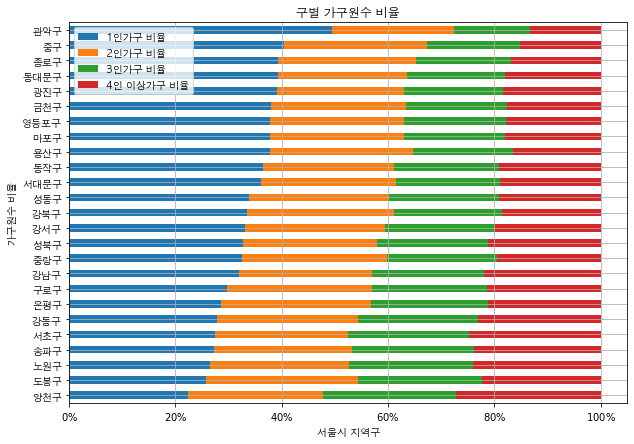

In [265]:
df1.plot(kind='barh', stacked=True,figsize=(10,7))
plt.xlabel('서울시 지역구')
plt.ylabel('가구원수 비율')
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0],
           [r'$0\%$', r'$20\%$', r'$40\%$', r'$60\%$', r'$80\%$',r'$100\%$'])
plt.title('구별 가구원수 비율')
plt.grid()
plt.show()

### 상관관계 확인하기

In [211]:
df_tmp = data_result2[['외국인비율','고령자비율','1인가구 비율','2인가구 비율','3인가구 비율','4인 이상가구 비율']]
df_corr = df_tmp.corr()
df_corr

,외국인비율,고령자비율,1인가구 비율,2인가구 비율,3인가구 비율,4인 이상가구 비율
외국인비율,1.000000,0.139582,0.590722,-0.154249,-0.596691,-0.623285
고령자비율,0.139582,1.000000,0.108239,0.569023,-0.169144,-0.326916
1인가구 비율,0.590722,0.108239,1.000000,-0.535820,-0.993366,-0.949540
2인가구 비율,-0.154249,0.569023,-0.535820,1.000000,0.468670,0.249286
3인가구 비율,-0.596691,-0.169144,-0.993366,0.468670,1.000000,0.960950
4인 이상가구 비율,-0.623285,-0.326916,-0.949540,0.249286,0.960950,1.000000


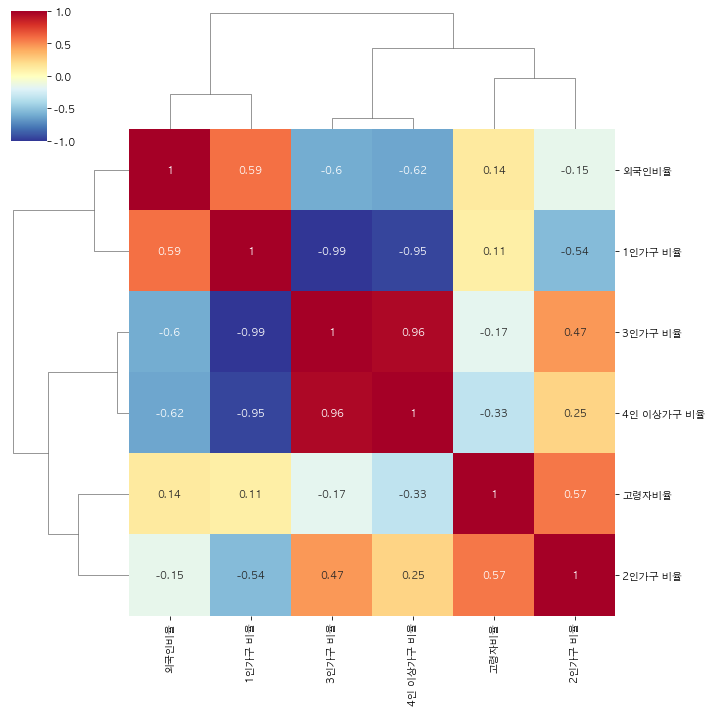

In [264]:
sns.clustermap(df_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

#### 1인가구와 외국인

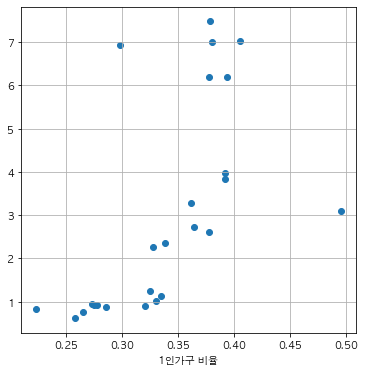

In [217]:
plt.figure(figsize=(6,6))
plt.xlabel('1인가구 비율')
plt.scatter(data_result2['1인가구 비율'], data_result2['외국인비율'])
plt.grid()
plt.show()

In [218]:
fp1 = np.polyfit(data_result2['1인가구 비율'], data_result2['외국인비율'], 1)
fp1

array([23.48078097, -4.92658962])

In [223]:
f1 = np.poly1d(fp1)
fx = np.linspace(0.2,0.5, 100)

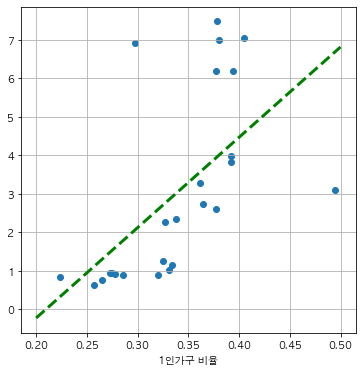

In [224]:
plt.figure(figsize=(6,6))
plt.xlabel('1인가구 비율')
plt.scatter(data_result2['1인가구 비율'], data_result2['외국인비율'])
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.grid()
plt.show()

In [228]:
fp1 = np.polyfit(data_result2['1인가구 비율'], data_result2['외국인비율'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(0.2,0.5, 100)

data_result2['오차'] = np.abs(data_result2['1인가구 비율']- f1(data_result2['외국인비율']))

df_sort2 = data_result2.sort_values(by='오차', ascending=False)
df_sort2.set_index('구별',inplace=True)
df_sort2.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,1인,2인,3인,4인 이상,평균가구원수,1인가구 비율,2인가구 비율,3인가구 비율,4인 이상가구 비율,오차
구별,,,,,,,,,,,,,,,,
영등포구,405982,375630,30352,60826,7.476194,14.982438,58214,38671,29661,27377,2.2,0.378202,0.251236,0.192700,0.177862,170.242071
중구,135321,125800,9521,24265,7.035863,17.931437,22078,14578,9540,8300,2.1,0.405131,0.267506,0.175059,0.152305,159.875835
금천구,249641,232157,17484,39361,7.003657,15.767041,37778,25207,18771,17559,2.2,0.380386,0.253809,0.189005,0.176801,159.144367
구로구,435751,405579,30172,69312,6.924138,15.906332,47740,43700,34624,34314,2.4,0.297672,0.272481,0.215890,0.213957,157.359903
용산구,244953,229786,15167,39995,6.191800,16.327622,35148,25164,17439,15426,2.2,0.377218,0.270067,0.187160,0.165556,140.084494


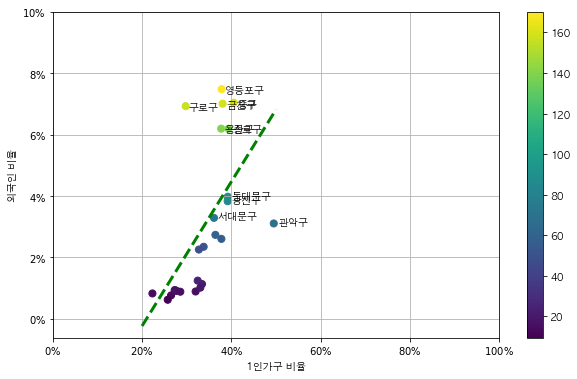

In [253]:
plt.figure(figsize=(10,6))
plt.scatter(data_result2['1인가구 비율'], data_result2['외국인비율'],c=data_result2['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort2['1인가구 비율'][n]*1.02, df_sort2['외국인비율'][n]*0.98, df_sort2.index[n] , fontsize=10)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0],
           [r'$0\%$', r'$20\%$', r'$40\%$', r'$60\%$', r'$80\%$',r'$100\%$'])
plt.yticks([0, 2, 4, 6, 8, 10],
           [r'$0\%$', r'$2\%$', r'$4\%$', r'$6\%$', r'$8\%$',r'$10\%$'])
plt.xlabel('1인가구 비율')
plt.ylabel('외국인 비율')

plt.colorbar()
plt.grid()
plt.show()